## Handwritten Digit Classification
#### Application of a Tensorflow sequential neural network on the MNIST dataset from Kaggle

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

/Users/gergelyfazekas/miniforge3/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Defining functions to convert the kaggle dataset to suitable format

In [2]:
def reverse_grayscale(df):
    """reverses grayscale values so that 0 is black and 255 is white"""
    # Lambda func: 
    reverse_color = np.vectorize(lambda x: 255-x)
    
    # Stripping labels
    without_label = df.iloc[:,1:]
    
    # Applying reverse_color row-wise
    new_colors_df = without_label.apply(reverse_color, axis=0)
    
    # Reassign label
    new_colors_df['label'] = df['label']
    
    return new_colors_df

def df_to_array(df):
    """turns the images' representation from pd.DataFrame to np.array
    returns a dictionary: key = img id, value = [label, np.array]
    """
    
    def convert_to_img_array(df_row):
        """converts one row of df into a 28x28 np array that represents the image"""
        # Stack rows in a list of lists
        img_rows = []
        for i in range(28):
            img_rows.append(df_row.iloc[28*i:(28*i+28)])
        # Convert to np.array
        pic_array = np.array(img_rows)
        return pic_array
    
    # Create a dictionary of images: key=id, value=(label, np.array)
    result = dict(zip(list(df.index) , [list(item) for item in list(zip(df['label'], [None]* len(df['label'])))]))
    
    # Apply convert_to_img_array row_wise
    for row in df.iterrows():
        # iterrows returns a tuple of (index, row series) -- we need both
        image = convert_to_img_array(row[1])
        result[row[0]][1] = image
        
    return result

def train_test_split(input_dict, ratio=0.8):
    d = input_dict.copy()
    test_size = round((1-ratio) * len(list(d.keys())))
    test_set_keys = list(np.random.choice(list(d.keys()), size=test_size, replace=False))
    
    test = {}
    for k in test_set_keys:
        test[k] = d[k]
        d.pop(k)
        
    train = d.copy()
    
    train_list = list(train.values())
    test_list =list(test.values())
    
    y_train, X_train = [item[0] for item in train_list], [item[1] for item in train_list]
    y_test, X_test = [item[0] for item in test_list], [item[1] for item in test_list]
    
    return (np.array(X_train), np.array(y_train)), (np.array(X_test), np.array(y_test))

### 1. Loading the data

In [3]:
mnist = pd.read_csv("train.csv")

### 2. Preprocessing colors shapes and data types

In [6]:
df_reversed = reverse_grayscale(mnist)
img_dict = df_to_array(df_reversed)

# Normalize grayscale values
for k in img_dict.keys(): 
    img_dict[k][1] = tf.keras.utils.normalize(img_dict[k][1], axis=1)

### 3. Train-test split

In [7]:
(X_train, y_train), (X_test, y_test) = train_test_split(img_dict)

### 4. Model

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1


2023-01-16 19:11:25.688612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-16 19:11:25.689212: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 5. Fitting and evaluating the model

In [18]:
model.fit(X_train, y_train, epochs=10)

model.save('handwritten_NN')

Epoch 1/10
  25/1050 [..............................] - ETA: 4s - loss: 0.3359 - accuracy: 0.8900

2023-01-16 19:13:27.094676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - 5s 4ms/step - loss: 0.2794 - accuracy: 0.9145
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2412 - accuracy: 0.9252
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2093 - accuracy: 0.9362
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1915 - accuracy: 0.9402
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1716 - accuracy: 0.9465
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1592 - accuracy: 0.9505
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1446 - accuracy: 0.9555
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1368 - accuracy: 0.9575
Epoch 9/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1307 - accuracy: 0.9599
Epoch 10/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1196 - accurac

In [19]:
model = tf.keras.models.load_model('handwritten_NN')

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(" ")
print("Loss: ", round(loss,3), "--", "Accuracy: ", round(accuracy,3))

 27/263 [==>...........................] - ETA: 0s - loss: 0.1398 - accuracy: 0.9583

2023-01-16 19:14:17.900895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


263/263 [==============================] - 1s 4ms/step - loss: 0.1236 - accuracy: 0.9635
 
Loss:  0.124 -- Accuracy:  0.963


### Testing visually

1/1 [==============================] - 0s 18ms/step
 
Number detected:  1


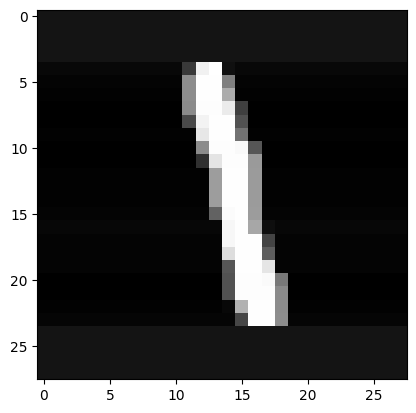

In [25]:
# Select and image randomly from the test set
rand_int = np.random.randint(0,8399,1)[0]
random_image = X_test[rand_int : rand_int+1]

# Predict the class probabilities and the label
predicted_probabilities = model.predict(random_image)
predicted_label = np.argmax(predicted_probabilities)

# Show
plt.imshow(random_image[0], cmap=plt.cm.binary)
print(" ")
print("Number detected: ", predicted_label)